In [1]:
%load_ext autoreload


In [2]:
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
''' Sn properties - Masses, Ratios, Cup Configurations, ... '''
from sn_config import *
'''Classes for Reading in the Data and applying Internal Normalisation'''
from nu_data_reduction import NU_data_read, int_norm, evaluation
from pylab import plot, show, savefig
from scipy import stats
#%pylab inline

In [107]:
path = "/Volumes/friebelm/PhD/NU Plasma/Measurements/2015-03-25/"
path_sav = "/Volumes/friebelm/PhD/NU Plasma/Measurements/compilation/"
files_start = 1348
files_end = 1427


In [114]:
# cup configuration
#cup_config = cycle_Sb
cup_config = cycles2
# Isotopes used for Interference correction
corr_isotopes_1 = {"Cd" : "111", "Te" : "126"}
corr_isotopes_2 = {"Cd" : "111","Te" : "125", "Xe" : "129"}
corr_isotopes_Sb = {"Te": "125"}
# Mass Range of cup configuration
mass_range = cycles2_mass_range
#isotopes = [["111", "112", "114", "115", "116", "117", "118", "119", "122", "124"], ["117", "118", "119", "122", "124"]]
isotopes = [["112", "114", "115", "116", "117", "119", "120", "122", "124"]]
#isotopes = [["116", "117", "118", "119", "122", "124"]]
isotope_column = ["112", "114", "115", "116", "117", "119", "120", "122", "124"]
data_sample_column = [(i + "/" + "118") for i in isotope_column]

denom_isotope = "118"
norm_ratio = ["122","118"]
#number of iterations for beta
iter_beta = 10

# Interference_corr on the denominator isotope
isotope_denom_corr = True

blk_corr = False

In [109]:
columns_1 = ["cycle", "sample", "date", "H8 (1)", "H7 (1)", "H6 (1)", "H5 (1)", "H4 (1)", "H3 (1)", "H2 (1)", "H1 (1)", "Ax (1)", "L1 (1)", "L2 (1)", "L3 (1)", "L4 (1)"]
columns_2 = ["cycle", "H8 (2)", "H7 (2)", "H6 (2)", "H5 (2)", "H4 (2)", "H3 (2)", "H2 (2)", "H1 (2)", "Ax (2)", "L1 (2)", "L2 (2)", "L3 (2)", "L4 (2)"]
df_all = pd.DataFrame()
blk_ls = []
sample_ls = []
files_1 = range(files_start, files_end, 1)
#files_1 = range(100, 125, 1) + range(132, 165, 1)
for sample in files_1:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    df_zero = df.data_zero_corr(sample)
    df_zero_1 = pd.DataFrame(df_zero["cycle1"])
    df_zero_2 = pd.DataFrame(df_zero["cycle2"])
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    df_zero_1["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    df_zero_1["sample"] = sample_name
    df_zero_1["cycle"] = df_zero_1.index.values
    df_zero_2["cycle"] = df_zero_2.index.values
    df_zero_1.index = df_zero_1["date"]
    df_zero_1 = df_zero_1[columns_1]
    df_zero_2 = df_zero_2[columns_2]
    df_all = df_all.append(df_zero_1.merge(df_zero_2), ignore_index = True)
    #df_all = df_all.append(df_zero_1, ignore_index = True)
    
    if sample_name == "blank sol" or sample_name == "wash" or sample_name == "wash clean":
        blk_ls.append(sample)
    elif sample_name == "SQ" or sample_name == "teflon blank" or sample_name == "4ml HDPE blank" or sample_name == "blank sample":
        None
    else:
        sample_ls.append(sample)

df_all.set_index("date", inplace = True)
df_all
#for x in [123]:
#    sample_ls.remove(x)
#blk_ls

,cycle,sample,H8 (1),H7 (1),H6 (1),H5 (1),H4 (1),H3 (1),H2 (1),H1 (1),...,H5 (2),H4 (2),H3 (2),H2 (2),H1 (2),Ax (2),L1 (2),L2 (2),L3 (2),L4 (2)
date,,,,,,,,,,,,,,,,,,,,,
2015-03-25 14:17:00,1,blank sol,0.000261,0.000188,0.001545,0.000314,0.000870,0.000304,0.000597,0.000044,...,0.000162,0.000067,0.000286,-0.000008,0.000205,-1.601680e-05,0.001579,0.000345,0.000893,0.000285
2015-03-25 14:17:00,2,blank sol,0.000256,0.000172,0.001617,0.000332,0.000899,0.000298,0.000581,0.000049,...,0.000199,0.000022,0.000288,0.000009,0.000210,-2.311860e-05,0.001644,0.000364,0.000909,0.000304
2015-03-25 14:17:00,3,blank sol,0.000289,0.000184,0.001586,0.000322,0.000898,0.000261,0.000612,0.000018,...,0.000180,0.000040,0.000274,-0.000015,0.000208,6.177900e-06,0.001542,0.000337,0.000858,0.000267
2015-03-25 14:17:00,4,blank sol,0.000300,0.000214,0.001744,0.000360,0.000984,0.000308,0.000676,0.000024,...,0.000220,0.000073,0.000291,0.000047,0.000216,-6.250700e-06,0.001805,0.000615,0.001008,0.000362
2015-03-25 14:17:00,5,blank sol,0.000363,0.000252,0.002071,0.000442,0.001237,0.000356,0.000794,0.000041,...,0.000190,0.000084,0.000331,0.000018,0.000202,6.177700e-06,0.001809,0.000385,0.001053,0.000331
2015-03-25 14:17:00,6,blank sol,0.000309,0.000213,0.001790,0.000350,0.001033,0.000321,0.000683,-0.000012,...,0.000191,0.000079,0.000334,0.000012,0.000218,-1.069030e-05,0.001878,0.000420,0.001113,0.000359
2015-03-25 14:17:00,7,blank sol,0.000276,0.000211,0.001647,0.000340,0.000939,0.000268,0.000653,0.000009,...,0.000159,0.000070,0.000280,0.000012,0.000187,-9.241000e-07,0.001661,0.000407,0.000937,0.000323
2015-03-25 14:17:00,8,blank sol,0.000297,0.000183,0.001613,0.000311,0.000936,0.000272,0.000614,0.000042,...,0.000192,0.000056,0.000286,0.000018,0.000200,-1.690540e-05,0.001629,0.000331,0.000905,0.000317
2015-03-25 14:17:00,9,blank sol,0.000297,0.000198,0.001654,0.000306,0.000910,0.000289,0.000607,0.000014,...,0.000198,0.000008,0.000269,-0.000005,0.000179,7.953900e-06,0.001563,0.000337,0.000899,0.000282


In [115]:
df_raw_signals = pd.DataFrame()
df_internal_norm = pd.DataFrame()

for sample in sample_ls:
    df = NU_data_read(path, sample, cup_config)
    cycles = range(1, len(df.data_read(sample).index)+1)
    # arbitrary blank positions
    #blk1 = [item for item in blk_ls if item < sample]
    #blk2 = [item for item in blk_ls if item > sample]
    #blk1 = blk1[-1]
    #blk2 = blk2[0]
    #blk_corr_sample = True
    
    # blank measurement surrounds sample
    #if ((sample-1) in blk_ls) and ((sample+1) in blk_ls):
    #    blk1 = sample-1
    #    blk2 = sample+1
    #    blk_corr_sample = True
    #else:
    #    blk_corr_sample = False
    
    if (blk_corr == True) and (blk_corr_sample == True):
        blk_1 = NU_data_read(path, blk1, cup_config)
        blk_2 = NU_data_read(path, blk2, cup_config)
        df_zero = df.data_zero_corr(sample)
        df_bgd_1 = blk_1.data_zero_corr(blk1)
        df_bgd_2 = blk_2.data_zero_corr(blk2)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
        new_corr.data_bgd_corr(df_bgd_1, df_bgd_2)
    else:
        df_zero = df.data_zero_corr(sample)
        new_corr = evaluation(df_zero, cycles, isotopes, cup_config, database, mass_range, corr_isotopes_2 , denom_corr_ratio)
        new_corr.line2_corr(df_zero, "119")
    
    data_sample_raw = new_corr.raw_signals(denom_isotope)
    data_sample_raw = pd.DataFrame.from_dict(data_sample_raw, orient = 'index')
    data_sample_raw = new_corr.mad_outlier_rejection(data_sample_raw)
    
    data_sample = new_corr.internal_norm_2(norm_ratio, denom_isotope, iter_beta)
    data_sample = pd.DataFrame.from_dict(data_sample, orient = 'index')
    data_sample = new_corr.mad_outlier_rejection(data_sample)
    
    sample_name = df.extract_metadata(sample, "Sample Name")
    date = df.extract_metadata(sample, "Date")
    starttime = df.extract_metadata(sample, "Start Time")
    data_sample = data_sample.drop(denom_isotope, axis=1)
    data_sample = data_sample[sorted(data_sample.columns)]
    data_sample.columns = data_sample_column
    data_sample["date"] = datetime.strptime(date+starttime, '%d/%m/%Y%H:%M')
    data_sample["sample"] = sample_name
    data_sample["cycle"] = data_sample.index.values
    
    data_sample_raw["cycle"] = data_sample_raw.index.values
    data_sample = data_sample.merge(data_sample_raw)
    
    df_internal_norm = df_internal_norm.append(data_sample)
    print sample, sample_name

1349 NIST 100ppb
1350 SPEX 100ppb
1351 NIST 100ppb
1352 SPEX 100ppb
1353 NIST 100ppb
1354 SPEX 100ppb
1355 NIST 100ppb
1356 SPEX 100ppb
1357 NIST 100ppb
1359 NIST 100ppb
1360 SPEX 100ppb
1361 NIST 100ppb
1362 SPEX 100ppb
1363 NIST 100ppb
1364 SPEX 100ppb
1365 NIST 100ppb
1366 SPEX 100ppb
1367 NIST 100ppb
1371 NIST 100ppb
1372 SPEX1 II 3_1
1373 NIST 100ppb
1374 BHVO-2 1_1(2)
1375 NIST 100ppb
1376 BHVO-2 1_2(1)
1377 NIST 100ppb
1378 SPEX1 II 4_1
1379 NIST 100ppb
1381 NIST 100ppb
1382 SPEX 100ppb
1383 NIST 100ppb
1384 SPEX 100ppb
1385 NIST 100ppb
1386 SPEX 100ppb
1387 NIST 100ppb
1388 SPEX 100ppb
1389 NIST 100ppb
1391 NIST 100ppb
1392 SPEX1 1_1(1)
1393 NIST 100ppb
1394 BHVO-2 2_1
1395 NIST 100ppb
1396 BHVO-2 2_2
1397 NIST 100ppb
1398 J1 1_1
1399 NIST 100ppb
1401 NIST 100ppb
1402 J2 1_1
1403 NIST 100ppb
1404 SPEX1 2_1
1405 NIST 100ppb
1407 NIST 100ppb
1408 SPEX 100ppb
1409 NIST 100ppb
1410 SPEX 100ppb
1411 NIST 100ppb
1412 SPEX 100ppb
1413 NIST 100ppb
1414 SPEX 100ppb
1415 NIST 100ppb
1417

In [116]:
df_internal_norm= df_internal_norm.set_index("date")
columns = ["cycle", "sample"]
columns.extend(data_sample_column)
columns.extend(sorted(data_sample_raw.drop("cycle", axis=1).columns))
df_internal_sub = pd.DataFrame(df_internal_norm, columns = columns)

df_all_sub = df_all[(df_all["sample"] != "blank sol") & (df_all["sample"] != "SQ") & (df_all["sample"] != "teflon blank") & (df_all["sample"] != "wash clean") & (df_all["sample"] != "blank sample")]
df_internal_sub["111"] = df_all_sub["L3 (1)"]
df_internal_sub["125"] = df_all_sub["H5 (2)"]
df_internal_sub["Cd/Sn"] = (df_all_sub["L3 (1)"]/12.722)/(df_all_sub["H4 (1)"]/24.223)
df_internal_sub["Te/Sn"] = (df_all_sub["H5 (2)"]/7.0509)/(df_all_sub["H4 (1)"]/24.223)
#df_external_sub.to_csv(path_sav + "Sn_H9_L4_internal_corr_all.csv")
df_internal_norm

,112/118,114/118,115/118,116/118,117/118,119/118,120/118,122/118,124/118,sample,...,120,122,115,114,117,116,124,112,119,118
date,,,,,,,,,,,,,,,,,,,,,
2015-03-25 14:27:00,0.040142,0.027179,0.013941,0.600282,0.316721,0.354613,1.346071,0.19125,0.239014,NIST 100ppb,...,14.502079,2.115670,0.140327,0.269969,3.277008,6.126275,2.713733,0.387513,3.769787,10.488113
2015-03-25 14:27:00,0.040139,0.027177,0.013946,0.600291,NaN,0.354624,1.346072,0.19125,0.239022,NIST 100ppb,...,15.133958,2.207938,0.146478,0.281717,3.419375,6.392780,2.832290,0.404333,3.934091,10.944646
2015-03-25 14:27:00,0.040130,0.027171,0.013942,0.600318,0.316715,0.354624,1.346099,0.19125,0.239007,NIST 100ppb,...,15.168154,2.212961,0.146748,0.282336,3.426985,6.406956,2.838650,0.405149,3.942823,10.968771
2015-03-25 14:27:00,0.040139,0.027173,0.013944,0.600308,0.316714,0.354609,1.346082,0.19125,0.239026,NIST 100ppb,...,14.744959,2.151154,0.142696,0.274495,3.331647,6.228749,2.759470,0.394001,3.832794,10.663371
2015-03-25 14:27:00,0.040144,0.027176,0.013942,0.600340,0.316724,0.354624,1.346018,0.19125,0.238992,NIST 100ppb,...,14.682179,2.142120,0.142065,0.273357,3.317664,6.202724,2.747516,0.392362,3.816796,10.618361
2015-03-25 14:27:00,0.040132,0.027168,0.013945,0.600319,0.316730,0.354620,1.346059,0.19125,0.239012,NIST 100ppb,...,14.812584,2.161243,0.143326,0.275653,3.346725,6.256471,2.772481,0.395620,3.850399,10.711552
2015-03-25 14:27:00,0.040149,0.027182,0.013945,0.600339,0.316722,0.354624,1.346079,0.19125,0.238992,NIST 100ppb,...,14.924170,2.177595,0.144391,0.277785,3.371540,6.303067,2.793354,0.398642,3.879291,10.791538
2015-03-25 14:27:00,0.040133,0.027177,0.013936,NaN,NaN,0.354604,1.346101,0.19125,0.239014,NIST 100ppb,...,14.616119,2.132351,0.141363,0.272096,3.302366,6.173368,2.735238,0.390448,3.799182,10.569978
2015-03-25 14:27:00,0.040143,0.027172,0.013938,0.600297,0.316720,0.354609,1.346046,0.19125,0.238993,NIST 100ppb,...,14.273410,2.082430,0.138074,0.265694,3.225227,6.029555,2.670958,0.381423,3.710310,10.322588


In [117]:
def SE(x):
    SE = np.std(x) / x.count()
    return SE

df_internal_norm_mean = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).mean()
df_internal_norm_mean_sd = df_internal_sub.drop("cycle", axis=1).groupby(df_internal_sub.index).agg([np.mean, SE])
df_internal_norm_mean["sample"] = df_internal_norm[df_internal_norm["cycle"] == 1]["sample"]
df_internal_norm_mean_sd["sample"] = df_internal_norm[df_internal_norm["cycle"] == 1]["sample"]
#df_internal_norm_mean = df_internal_norm_mean[1:]
#df_internal_norm_mean = df_internal_norm_mean.drop(datetime.strptime("20150310 23:59", "%Y%m%d %H:%M"))
#df_internal_norm_mean_sd = df_internal_norm_mean_sd[1:]
df_internal_norm_mean
#plotplot = df_internal_norm_mean[(df_internal_norm_mean["125"] < 0.00010)  & (df_internal_norm_mean["124/120"] > 0.17745)] 
#plot(plotplot["125"], plotplot["124/120"], "ro")

,112/118,114/118,115/118,116/118,117/118,119/118,120/118,122/118,124/118,112,...,118,119,120,122,124,111,125,Cd/Sn,Te/Sn,sample
date,,,,,,,,,,,,,,,,,,,,,
2015-03-25 14:27:00,0.040141,0.027175,0.013942,0.600315,0.316722,0.354614,1.346057,0.19125,0.238999,0.386706,...,10.469486,3.763330,14.477657,2.112139,2.709321,0.000115,0.000196,0.000021,0.000065,NIST 100ppb
2015-03-25 14:39:00,0.040142,0.027172,0.013956,0.600331,0.316726,0.354619,1.346055,0.19125,0.238993,0.380302,...,10.301584,3.704154,14.251619,2.079864,2.668474,0.000132,0.000205,0.000024,0.000068,SPEX 100ppb
2015-03-25 14:52:00,0.040137,0.027170,0.013945,0.600323,0.316725,0.354624,1.346060,0.19125,0.238999,0.384368,...,10.405843,3.740617,14.390387,2.099710,2.693488,0.000135,0.000206,0.000025,0.000068,NIST 100ppb
2015-03-25 15:04:00,0.040140,0.027171,0.013957,0.600316,0.316726,0.354613,1.346056,0.19125,0.238992,0.384732,...,10.424026,3.747462,14.418682,2.104303,2.699885,0.000128,0.000200,0.000023,0.000066,SPEX 100ppb
2015-03-25 15:16:00,0.040144,0.027174,0.013947,0.600330,0.316732,0.354620,1.346052,0.19125,0.238991,0.387607,...,10.496267,3.773296,14.516943,2.118426,2.717703,0.000121,0.000209,0.000022,0.000068,NIST 100ppb
2015-03-25 15:29:00,0.040141,0.027174,0.013957,0.600330,0.316725,0.354618,1.346050,0.19125,0.238987,0.378361,...,10.250829,3.685298,14.179432,2.069451,2.655180,0.000131,0.000189,0.000024,0.000063,SPEX 100ppb
2015-03-25 15:41:00,0.040143,0.027175,0.013947,0.600329,0.316735,0.354616,1.346050,0.19125,0.238997,0.380117,...,10.295784,3.701292,14.240496,2.078205,2.666326,0.000127,0.000191,0.000023,0.000064,NIST 100ppb
2015-03-25 15:54:00,0.040141,0.027174,0.013956,0.600324,0.316731,0.354616,1.346078,0.19125,0.238997,0.375450,...,10.175961,3.658556,14.077610,2.054363,2.636186,0.000118,0.000189,0.000022,0.000064,SPEX 100ppb
2015-03-25 16:06:00,0.040140,0.027172,0.013947,0.600331,0.316734,0.354618,1.346068,0.19125,0.238996,0.376545,...,10.199360,3.666656,14.107386,2.058764,2.641381,0.000135,0.000218,0.000025,0.000074,NIST 100ppb


In [26]:
#plot_Nist = df_internal_norm_mean[df_internal_norm_mean["sample"] == "NIST 100ppb"]
plot_Nist = df_internal_norm_mean[(df_internal_norm_mean["118"] >= .5)]
#dataplot = plot(plot_Nist["Te/Sn"], plot_Nist["124/120"], "ro")
dataplot = plot(plot_Nist.index, plot_Nist["120"], "ro")
show(dataplot)

In [80]:
sub_index = df_internal_norm_mean[(df_internal_norm_mean["sample"].shift(1) == df_internal_norm_mean["sample"].shift(-1)) & (df_internal_norm_mean["sample"].shift(1) == "NIST 100ppb")].index
#corr_values = df_internal_norm_mean[(df_external_norm_mean >= 0.74289)]
#corr_values = df_internal_norm_mean[:"20150110 10:00"]
corr_values = df_internal_norm_mean[df_internal_norm_mean["118"] >= 1]
#corr_values = df_internal_norm_mean
sample = corr_values["sample"]
std_mean = corr_values[(corr_values["sample"] == "SPEX1 100ppb")].mean()
new = corr_values[corr_values.columns[corr_values.dtypes != 'object']]

#std_mean["112/120", "114/120", "115/120", "117/120", "118/120", "119/120", "122/120", "124/120"] = [0.029823, 0.020189, 0.010372, 0.235299, 0.742923, 0.263443, 0.142078, 0.177546]
#print std_mean
epsilon =  ((new / std_mean)-1)*10000
#new["sample"] = sample
#epsilon_NIST =  ((new / ((new.shift(1) + new.shift(-1))/2))-1)*10000
#epsilon_2 = ((new / ((new.shift(2) + new.shift(-2))/2))-1)*10000
epsilon["sample"] = sample
#epsilon_2["sample"] = sample

#epsilon = epsilon[new.index.isin(sub_index)]
#new[new.sample != "NIST 100ppb"]
#epsilon_2 = epsilon_2[epsilon_2["sample"] == "NIST 100ppb"]
#epsilon_comp = epsilon_NIST.append(epsilon_2, ignore_index=True)
epsilon

,111,112,112/118,114,114/118,115,115/118,116,116/118,117,...,119/118,120,122,122/118,124,124/118,125,Cd/Sn,Te/Sn,sample
date,,,,,,,,,,,,,,,,,,,,,
2014-11-19 17:29:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NIST 100ppb
2014-11-19 18:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NIST 100ppb
2014-11-19 19:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NIST 100ppb
2014-11-19 19:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SPEX 50ppb
2014-11-19 19:46:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NIST 100ppb
2014-11-19 20:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SPEX 100ppb
2014-11-19 20:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NIST 100ppb
2014-11-19 20:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SPEX 200ppb
2014-11-19 21:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NIST 100ppb


In [55]:
def SD2(x):
    SD2 = np.std(x) * 2
    return SD2

epsilon = epsilon.drop(["111", "125", "112", "114", "115", "116", "117", "118", "119", "120", "122", "124", "Cd/Sn", "Te/Sn"], axis = 1)
#epsilon = epsilon.drop(["118"], axis = 1)
epsilon_sum = np.round(epsilon.groupby("sample").agg([np.mean, SD2]), decimals=2)
epsilon_sum

112/118       114/118       115/118       116/118       117/118  \
                mean   SD2    mean   SD2    mean   SD2    mean   SD2    mean   
sample                                                                         
SPEX1 100ppb       0  1.49       0  2.13       0  2.56       0  0.15      -0   

                   119/118       120/118       122/118     124/118        
               SD2    mean   SD2    mean   SD2    mean SD2    mean   SD2  
sample                                                                    
SPEX1 100ppb  0.12       0  0.15       0  0.15       0   0      -0  0.33

In [47]:
x = range(1, len(epsilon_sum.index)+1)
errorbar(epsilon_sum["112/118"]["mean"], x, xerr = epsilon_sum["112/118"]["SD2"], ls='none', marker="o")
title("all standards")
xlim([-4, 4])
ylim([0.5, 2.5])
yticks(x, epsilon_sum.index, size='small', rotation=0)
ylabel(r'$\mathregular{\epsilon^{112}}$Sn$_{SPEX}$')
#savefig(path_sav+"epsilon_124_stds.pdf", bbox_inches='tight')

NameError: name 'errorbar' is not defined

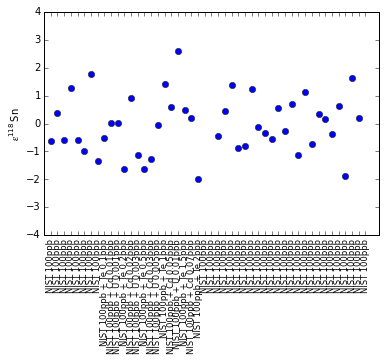

In [133]:
x = range(1, len(epsilon_comp["sample"])+1)
plot(x, epsilon_comp["112/120"], marker="o", ls="none")
ylim([-4, 4])
xticks(x, epsilon_comp["sample"], size='small', rotation=90)
ylabel(r'$\mathregular{\epsilon^{118}}$Sn')
#savefig(path+"epsilon_119.pdf", bbox_inches='tight')

In [16]:
df_all.to_csv(path_sav + "Sn_H8_L4_2_cycles_NU_Signals_zero_corr.csv", mode='a', header=False)

In [195]:
df_internal_sub.to_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm.csv", mode='a', header=False)

In [118]:
df_internal_norm_mean_sd.to_csv(path + "Sn_H8_L4_2_cycles_internal_norm_122_118_mad.csv", mode='w', header=True)

In [1226]:
df_std.to_csv(path_sav + "All_standards_internal_norm_mean.csv")

In [986]:
df_all_mean_1 = pd.read_csv(path_sav + "Sn_H9_L4_1_cycles_internal_norm_mean.csv")

In [987]:
df_all_mean_2 = pd.read_csv(path_sav + "Sn_H8_L4_2_cycles_internal_norm_mean.csv")

In [1088]:
df_mean_all = df_all_mean_1.append(df_all_mean_2)

In [1089]:
df_mean_all = df_mean_all[2:]
df_mean_all.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
df_mean_all = df_mean_all[["Date", "112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118","sample"]]
df_mean_all = df_mean_all.set_index("Date") 

In [1182]:
df_std = df_mean_all[(df_mean_all["sample"] == "SPEX1 100ppb") | (df_mean_all["sample"] == "SPEX 100ppb") | (df_mean_all["sample"] == "NIST 100ppb")]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 20:49:00,0.0298238495726,0.0201845997439,0.0103681594438,0.446,0.235295696368,0.742939518097,0.263445942562,0.142086185109,0.177571556759,10.1619395381,SPEX1 100ppb
2014-10-07 21:07:00,0.0298270855009,0.0201887834143,0.0103664239291,0.446,0.235295260593,0.742937654621,0.263447680516,0.14208571056,0.177573088542,10.2834847296,SPEX1 100ppb
2014-10-07 21:29:00,0.0298241010738,0.0201850728708,0.0103667030734,0.446,0.235295046713,0.742937732217,0.263449417694,0.142085954225,0.17757007419,10.0068814188,SPEX1 100ppb
2014-10-07 21:46:00,0.0298269719657,0.0201827454973,0.0103676568054,0.446,0.235297077525,0.742936157145,0.263450048386,0.142089277895,0.177573191934,10.1732362802,SPEX1 100ppb
2014-11-18 18:22:00,0.0298319477344,0.0201968060654,0.0103609914838,0.446,0.235308007067,0.74295144542,0.263456437295,0.142073025422,0.17753393783,11.9205622223,NIST 100ppb
2014-11-18 18:27:00,0.0298302415426,0.0202014506204,0.0103609667001,0.446,0.235304600881,0.742949759778,0.263451222795,0.142074064497,0.177531032284,11.8435340427,NIST 100ppb
2014-11-18 18:31:00,0.029834566445,0.0202024281122,0.0103608586407,0.446,0.235309236679,0.742955467382,0.263452936054,0.142073215452,0.177533064574,11.3634385069,NIST 100ppb
2014-11-18 18:36:00,0.0298236482085,0.0201946006554,0.0103617565758,0.446,0.235308318118,0.742946848523,0.263449990275,0.142074569672,0.177530832831,11.5416992302,NIST 100ppb
2014-11-18 18:40:00,0.0298227478429,0.0201921659888,0.0103615705949,0.446,0.235307461611,0.742950591745,0.263450041891,0.142075223065,0.177536326791,11.6314409578,NIST 100ppb


In [1183]:
df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]] = df_std[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120", "118"]].astype(float)
df_std.index = df_std.index.astype(datetime64)
df_std = df_std[(df_std.index < pd.Timestamp('2015-03-10')) | (df_std.index > pd.Timestamp('2015-03-12'))]
df_std = df_std[(df_std.index < pd.Timestamp('2014-11-29 18:25:00')) | (df_std.index > pd.Timestamp('2014-11-29 20:27:00'))]
df_std

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-10-07 18:49:00,0.029824,0.020185,0.010368,0.446,0.235296,0.742940,0.263446,0.142086,0.177572,10.161940,SPEX1 100ppb
2014-10-07 19:07:00,0.029827,0.020189,0.010366,0.446,0.235295,0.742938,0.263448,0.142086,0.177573,10.283485,SPEX1 100ppb
2014-10-07 19:29:00,0.029824,0.020185,0.010367,0.446,0.235295,0.742938,0.263449,0.142086,0.177570,10.006881,SPEX1 100ppb
2014-10-07 19:46:00,0.029827,0.020183,0.010368,0.446,0.235297,0.742936,0.263450,0.142089,0.177573,10.173236,SPEX1 100ppb
2014-11-18 17:22:00,0.029832,0.020197,0.010361,0.446,0.235308,0.742951,0.263456,0.142073,0.177534,11.920562,NIST 100ppb
2014-11-18 17:27:00,0.029830,0.020201,0.010361,0.446,0.235305,0.742950,0.263451,0.142074,0.177531,11.843534,NIST 100ppb
2014-11-18 17:31:00,0.029835,0.020202,0.010361,0.446,0.235309,0.742955,0.263453,0.142073,0.177533,11.363439,NIST 100ppb
2014-11-18 17:36:00,0.029824,0.020195,0.010362,0.446,0.235308,0.742947,0.263450,0.142075,0.177531,11.541699,NIST 100ppb
2014-11-18 17:40:00,0.029823,0.020192,0.010362,0.446,0.235307,0.742951,0.263450,0.142075,0.177536,11.631441,NIST 100ppb


In [1184]:
df_std = df_std[(df_std["118"] > 5) & (df_std["118/120"] > 0.7428)]
for i in df_std.index[df_std["sample"] == "SPEX1 100ppb"]:
    df_std.ix[i, "sample"] = "SPEX 100ppb"

In [1220]:
sample = df_std["sample"]
std_mean = df_std[(df_std["sample"] == "SPEX 100ppb")].mean()
new = df_std[df_std.columns[df_std.dtypes != 'object']]
epsilon =  ((new / std_mean)-1)*10000
epsilon["sample"] = sample
epsilon
epsilon[(epsilon["118/120"] > 0.4) | (epsilon["118/120"] < -0.4)]

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,118,sample
Date,,,,,,,,,,,
2014-11-18 18:54:00,-1.295126,-1.053575,1.608025,1.998401e-11,-1.180555,-0.463371,-0.356364,0.722133,2.010156,1309.494419,SPEX 100ppb
2014-12-06 22:37:00,-4.936059,-7.445774,1.331682,1.998401e-11,0.786625,0.539985,1.003885,0.222717,0.767402,-1614.119882,SPEX 100ppb
2014-12-06 22:52:00,-1.620072,-3.896472,0.536870,1.998401e-11,0.533814,0.527568,1.004705,0.469725,1.664357,-1804.778746,SPEX 100ppb
2014-12-06 23:08:00,-2.641746,-4.386719,2.125820,1.998401e-11,0.522416,0.475452,0.892735,0.462190,1.555222,-1848.039153,SPEX 100ppb
2014-12-06 23:23:00,-3.243182,-3.908338,-0.299309,1.998401e-11,0.613841,0.489401,0.951723,0.466426,1.660720,-1728.263406,SPEX 100ppb
2014-12-06 23:39:00,-3.174104,-5.626922,2.187946,1.998401e-11,0.711496,0.500329,0.913301,0.302836,1.500547,-1512.382276,SPEX 100ppb
2014-12-06 23:54:00,-2.499252,-3.686348,3.196847,1.998401e-11,0.532245,0.565307,0.943385,0.268384,1.570411,-1442.654967,SPEX 100ppb
2014-12-07 00:09:00,-3.167063,-4.997893,0.608021,1.998401e-11,0.745353,0.520016,1.039127,0.455542,1.559710,-1523.698889,SPEX 100ppb
2014-12-07 00:25:00,-2.027759,-4.105014,2.820000,1.998401e-11,0.605650,0.507195,0.913818,0.470145,1.538801,-1719.373397,SPEX 100ppb


In [1222]:
lee = pd.DataFrame({"112/120" : pd.Series(0.029812), "114/120" : pd.Series(0.020195), "115/120": pd.Series(0.010366), "116/120": pd.Series(0.4460), "117/120" : pd.Series(0.235313), "118/120" : pd.Series(0.742935), "119/120" : pd.Series(0.263430), "122/120" : pd.Series(0.142086), "124/120" : pd.Series(0.177588)})
epsilon_lee = ((lee / std_mean[["112/120", "114/120", "115/120", "116/120", "117/120", "118/120", "119/120", "122/120", "124/120"]])-1)*10000
epsilon_lee["sample"] = "Lee et al. (1995)"
epsilon_lee

,112/120,114/120,115/120,116/120,117/120,118/120,119/120,122/120,124/120,sample
0,-4.252887,1.76055,-2.836398,1.998401e-11,0.6046,0.052729,-0.550984,0.411199,1.946529,Lee et al. (1995)
